In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px

Задачей иследования является выявление признаков, характерных для определения вероятности того, что клиент откажется от услуг банка.
Исследование прводится на датасете, содержащим информацию о клиентах и их лояльности к банку (признак - "Exited" для ушедших клиентов равен 1, для оставшихся - 0)

Информация о данных:
RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
CustomerId — идентификатор клиента
Surname — фамилия клиента
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
Geography — страна клиента (банк международный)
Gender — пол клиента
Age — возраст клиента
Tenure — сколько лет клиент пользуется услугами банка
Balance — баланс на счетах клиента в банке
NumOfProducts — количество услуг банка, которые приобрёл клиент
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
EstimatedSalary — предполагаемая заработная плата клиента
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [3]:
churn = pd.read_csv('data/churn.csv')
churn.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [4]:
churn.tail(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


Удалим, ненужный по условия задачи столбец "RowNumber"

In [7]:
churn = churn.drop('RowNumber', axis = 1)
churn.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [97]:
churn.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### 1.Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

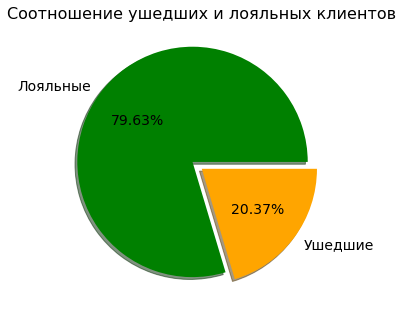

In [133]:
exited_comb = churn['Exited'].value_counts()
fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_comb,
    labels= ['Лояльные', 'Ушедшие'],
    colors = ('green', 'orange'),
    autopct='%.2f%%',
    textprops={'fontsize': 14},
    shadow=True,
    explode = [0.1, 0]
    )
axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=16);


Вывод: доля ушедших клиентов составляет 20.37%, что свидетельствует о том, что вопрос снижения оттока клиентов для банка является ключевым

### 2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

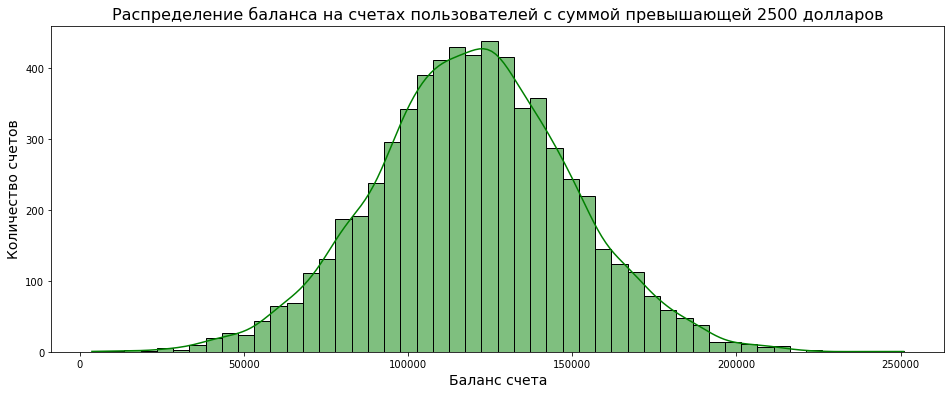

In [191]:
balance_df = churn[(churn['Balance'] > 2500)]
fig, ax = plt.subplots(figsize=(16, 6))
sns.histplot(
    data=balance_df, 
    x='Balance', 
    bins=50,
    color= 'g',
    kde = True)
ax.set_title('Распределение баланса на счетах пользователей с суммой превышающей 2500 долларов', fontsize=16)
ax.set_xlabel("Баланс счета", fontsize=14)
ax.set_ylabel("Количество счетов", fontsize=14)
plt.show()

Вывод: гистограмма распределение баланса на счетах пользователей имеет куполообразную форму без смещения, что свидетелствует о том, что данное распределение является нормальным. Так как выборка подчиняется нормальному закону распределения к ней можно применять параметрические статистические тесты, в частности рассчитывать медиану, среднее значение, а также формировать прогнозы.

### 3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

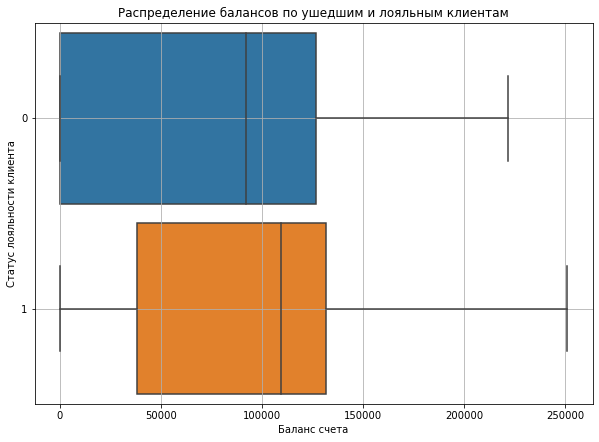

In [190]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение балансов по ушедшим и лояльным клиентам');
boxplot.set_xlabel('Баланс счета');
boxplot.set_ylabel('Статус лояльности клиента');
boxplot.grid()

Вывод: распределение показывает, что у ушедших клиентов больший разброс в балансе счетов, при этом медианное значение выше, чем у лояльных клиентов. Также следует отметить меньший по сравнению с лояльными клиентами межквартильный размах, следовательно разброс средних 50% балансов меньше. Если сравнить межквартильный размах балансов ушедших клиентов с интервалом  25% -75%  заработной платы (51-149 тыс. дол.), то можно сделать вывод, что ушедшие клиенты не хранили на счетах деньги свыше своего оклада. Нежелание клиентов хранить деньги на счете является либо следствием бедности клиента и невозможности формирования остатков на счетах (в этом случае возможно удержание за счет предоставление кредитных карт с небольшим кредитным лимитом), либо следствием низкой процентной ставки за хранение остатка на счете (в этом случае инструментами удержания могут быть либо повышение ставки на осаток по счету, либо предоставление бонусных карт лояльности, предоставляющие накопительные бонусы при обеспечении заданного лимита средств на счете). Если же это групповые зарплатные клиенты, то уход связан с отказом их работодателя от зарплатного проекта, в этом случае необходимо проанализировать условия зарплатного проекта для работодателей и работать над удержанием непосрественно фирм-работодателей, перечисляющих зарплату клиенту.

### 4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

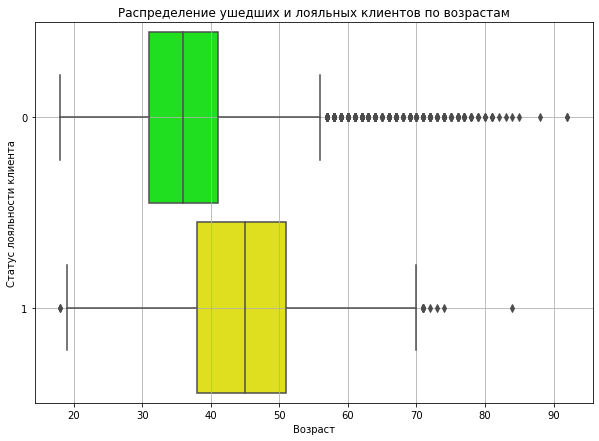

In [205]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn,
    y='Exited',
    x='Age',
    orient='h',
    palette=('lime', 'yellow'),
    width=0.9
)
boxplot.set_title('Распределение ушедших и лояльных клиентов по возрастам');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Статус лояльности клиента');
boxplot.grid()

Вывод: потенциальных выбросов по возрасту больше в группе лояльных клиентов. В группе ушедших клиентов выбросы незначительны и начинаются с возраста в 72 года. Что может быть обосновано как закрытием счета по причне смерти клиента, так и закрытием в связи с необходимостью снятия для существенных трат при отсутствии дохода кроме пенсии. банку необхолимо обратить внимание на удердание клиентов в возрасте от 38 до 52 лет, так как именно на них приходится 50% всех балансов ушедших клиентов.

### 5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

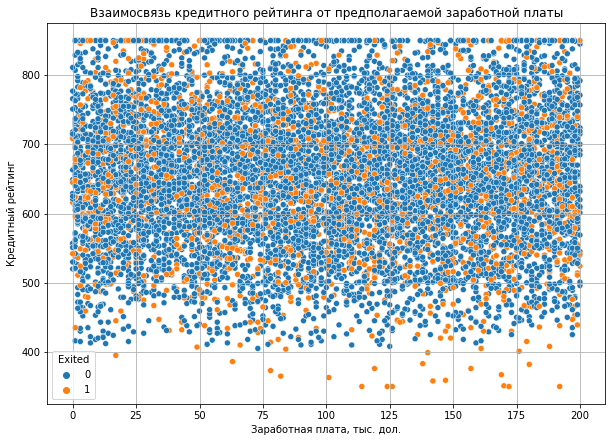

In [232]:
churn['RoundSalary'] = round(churn['EstimatedSalary']/1000,0)
fig = plt.figure(figsize=(10, 7))
sct= sns.scatterplot(
    data=churn, 
    x="RoundSalary", 
    y="CreditScore", 
    hue="Exited");
sct.set_title('Взаимосвязь кредитного рейтинга от предполагаемой заработной платы');
sct.set_xlabel('Заработная плата, тыс. дол.');
sct.set_ylabel('Кредитный рейтинг');
sct.grid()

Вывод:взаимосвязь между кредитным рейтингом и заработной платой отсутствует. Однако выявлена особенность, что самый низний рейтинг до 400 наблюдается у ушедших клиентов. проанализируем данную гипотезу на тепловой карте.

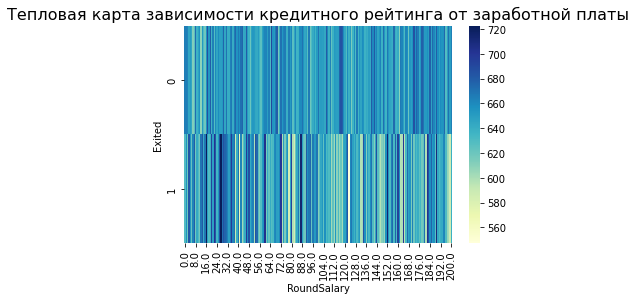

In [233]:
pivot = churn.pivot_table(
    values='CreditScore',
    columns='RoundSalary',
    index='Exited',
)
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта зависимости кредитного рейтинга от заработной платы', fontsize=16);

Вывод: у оставшихся клиентов наблюдается равномерный кредитный рейтинг от 620 до 700. Для клиентов в зарплатой до 16.0 рублей характерен боле низкий ретинг, а наибольший рейтинг у клиентов с зарплатой в диапазоне от 115 до 120 тыс.долларов.  В целом можно сдеать вывод, что оставшиеся клиенты достаточно интенсивно пользуются кредитными услугами банка. Для ушедших клиентов хараткерен низкий кредитный рейтинг, с резкими всплесками. Активно пользовались кредитами клиенты с зарплатой от 24 до 32 тыс. дол., видимо это необходимость для перекредитовки между зарпалатами. Интересующий нас диапазон кредитоспособных ушедших клиентов с зарплатой от 45 тыс. руб. характеризуется низкой кредитной активностью, а в некоторых случаев вообще отказом от кредитов. Следовательно для удержания клиентов банку следует проанализировать кредитыне предложения для клиентов.
    

### 6.Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

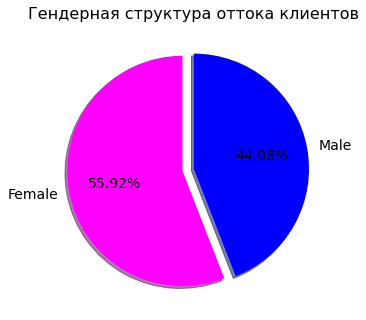

In [293]:
gender_df = churn.groupby(['Gender'])['Exited'].sum()
fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    gender_df,
    labels= gender_df.index,
    colors = ('magenta', 'blue'),
    startangle=90,
    autopct='%.2f%%',
    textprops={'fontsize': 14},
    shadow=True,
    explode = [0.1, 0]
    )
axes.set_title('Гендерная структура оттока клиентов', fontsize=16);

Вывод: Среди клиентов, прекративших взаимоотношения с банком 55.92% составляют женщины и 44.08% мужчины. Что свидетельствует о сильном влиянии полового признака на приняти решения об отказе от продолжения взаимоотношений с банком. Данный вывод следует учесть при разработке политики по удержанию клиентов, возможно разработка целевых бонусных программ или порграмм лояльности, ориантированных на женскую часть населения.

### 7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

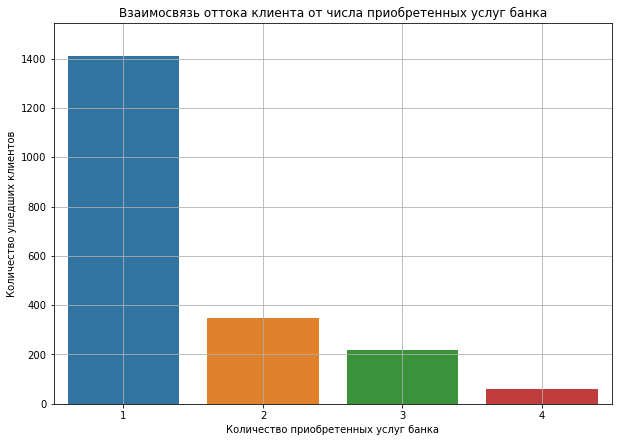

In [255]:
fig = plt.figure(figsize=(10, 7))
multybox = sns.barplot(
    x="NumOfProducts", 
    y="Exited",
    estimator=sum, 
    errwidth=0, 
    data=churn);
multybox.set_title('Взаимосвязь оттока клиента от числа приобретенных услуг банка');
multybox.set_xlabel('Количество приобретенных услуг банка');
multybox.set_ylabel('Количество ушедших клиентов');
multybox.grid()
plt.show()

Вывод: выявлена обратная зависимость оттока клиентов с увеличением числа услуг банка. Т.е. чем больше у клиента приобретенных банковских продуктов, тем меньше вероятность, что он прекратит взаимодействие с банком.

### 8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

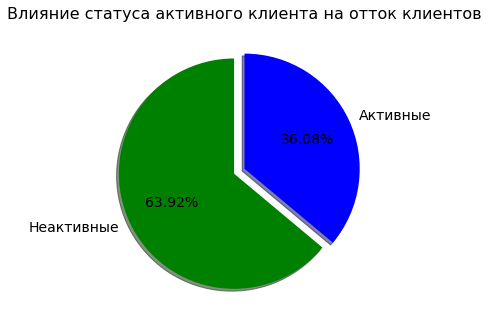

In [300]:
activ_df = churn.groupby(['IsActiveMember'])['Exited'].sum()
activ_df.head(2)
fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    activ_df,
    labels= ['Неактивные', 'Активные'],
    colors = ('green', 'blue'),
    startangle=90,
    autopct='%.2f%%',
    textprops={'fontsize': 14},
    shadow=True,
    explode = [0.1, 0]
    )
axes.set_title('Влияние статуса активного клиента на отток клиентов', fontsize=16);

Вывод: Неактивные клиенты составляют основную часть ушедших клиентов, следовательно банку необходимо стимулировать активную деятельность клиента со счетами, например делая переводы по счетам более привлекательными, чем снятие наличных. Разработать бонусную систему для активных пользователей, либо снижение комиссии за ведение счета при наличии активных операций по счету.

### 9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [310]:
fig = px.choropleth(
    data_frame=churn, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    scope = 'europe',
    color="Exited", #от чего зависит цвет
    range_color=[0, 0.3], #диапазон цвета
    title='Соотношение оттока клиентов на карте мира', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='fall' #палитра цветов
)

#отображаем график
fig.show()


Вывод: Основная часть ушедших клиентов приходится на Германию. Вероятно это связано с отрицательной ставкой по банковским вкладам, таким образом государство стимулирует инвестирование физическими лицами денег в экономику, а не хранение денег на счетах в банках.

### 10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

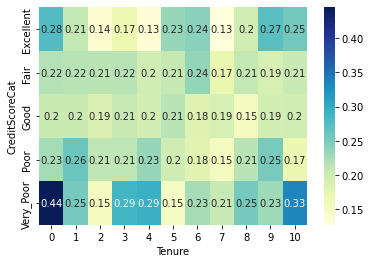

In [333]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn['CreditScoreCat'] = churn['CreditScore'].apply(get_credit_score_cat)

pivot = churn.pivot_table(
    values= 'Exited',
    columns='Tenure',
    index='CreditScoreCat')
sns.heatmap(data=pivot, annot=True, cmap='YlGnBu')
plt.show()


Вывод: чаще всего уходят клиенты первого года обслуживания с низким кредитным рейтингом, далее клиенты с продолжительностью владения счетов в 10 лет, но с низким кредитным статусом. Клиенты с низким кредитным рейтингом имеют высокую склонность к уходу, однако на третий и шестой год они демонстрируют снижение доли уходов, вплоть до минимальной. Банку необходимо проанализировать какие процессы в данный период повышают лояльность клиентов (возможно это бесплатный перевыпуск карты или бонусная программа). 
Следует отметить, что клиенты третего и восьмого года демонстрируют повышение лояльности во всех категориях. 

Низкий кредитный статус может быть обусловлен нетолько некредитоспособностью клиента, но может быть связан с нежеланием пользоваться услугами банка. Следует выяснить причины отказа от кредитования потенциально кредиспособными клиентами.

Высокую озабоченность вызывает отток клиентов с превосходным кредитным рейтингом, которые покидают банк в первый год, т.е практически после короткого периода общения с банком, отток клиентов первого года может свидетельствовать о неправильной рекламной компании, привлекшей клиентов, обещаниями, которые либо не были выполнены, либо в которых в последствии разочаровались клиенты. В частности скрытые комиссии, о которых не было указано, неудобный клиент-банк, ограничения на снятие и перечисления, которые не были озвучены при принятии на обслуживание.

Также наблюдается интенсивный отток клиентов с отличным статусом в период с 6 по 7 год и в 10-11 год.
Возможно это связано с тем, что они были привлечены кредитами на срок 5 или 10 лет и по истечении срока кредита уходят из банка. Банку следует проанализировать причины неудовлетворенности клиентов с целью улучшения программы лояльности при истечении срока кредитования клиента, чтобы удержать его в банке даже после того как он погасил кредит.